## Table of Contents

- [Setup](#SetUp)
- [Prepare the Data](#Prepare-the-data)
- [Feature Extraction](#Feature-Extraction)
 - [Conversation](#Conversation)
 - [General](#General)
 - [Engagement](#Engagement)
 - [Forward](#Forward)

## SetUp

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as pe
import seaborn as sb
import os
import numpy as np
import json

import warnings

warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

## Prepare the data

In [2]:
ROOT_DIR = 'ds-data'

In [3]:
dataDir = os.listdir(ROOT_DIR)
print(len(dataDir))

87


We have the records of overall 87 json data files, lets loop through and save them in a List Container

In [4]:
jsonDir = []
lengthVerify = 0
for dir in range(len(dataDir)):
    path = f"{ROOT_DIR}/{dataDir[dir]}/"
    jsonFile = os.listdir(path)[0]
    jsonDir.append(path+jsonFile)
    lengthVerify += pd.read_json(path+jsonFile).shape[0]

In [5]:
lengthVerify

34139

The function is quite not necessary, as we could directly use DataFrame on looping through each data/JsonFile. But never mind, we shall use `lenthVerify` to verify the total number of dataset. 

In [9]:
data = pd.DataFrame(pd.read_json(jsonDir[0]))
for dataPath in range(1,len(jsonDir)):
    data = pd.concat([data,pd.read_json(jsonDir[dataPath])])
    data = data

In [10]:
data.shape

(34139, 7)

In [11]:
data['id'].nunique()

34112

In [12]:
data_copy = data.copy() #just in case

<AxesSubplot:>

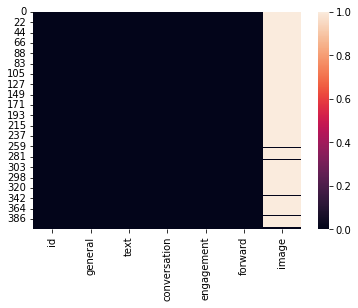

In [13]:
sb.heatmap(data.isnull())

In [14]:
data.isnull().sum()

id                  0
general             0
text                0
conversation        0
engagement          0
forward             0
image           33228
dtype: int64

Its not only about Images; we also have many empty values in `engagement`

In [15]:
data['conversation'].iloc[100]

{'root_ref': None,
 'reply_ref': 375599,
 'sender': {'ref': 2146264114,
  'avatar_url': None,
  'name': 'Carter',
  'username': 'Carter0434',
  'is_bot': False}}

In [16]:
data['engagement'].iloc[125]

{'reaction_list': [],
 'mentions_list': [],
 'hashtag_list': [],
 'external_links_list': []}

As we can see many of the engagement consists of empty list, let apply Feature Extraction

## Feature Extraction

Lets filter out the object data i.e., Dictionary of each feature into new features

Consider for an instance:
`conversion` feature consists of root_ref, sender details which makes valuable new features that help to recognize the overall engagement

In [17]:
col = data.drop('id',axis=1).columns

In [18]:
def filter_text(text_feat):
    return text_feat['text']

In [19]:
data['text'] = data['text'].apply(filter_text)

In [20]:
def filter_image(text_img):
    if text_img != None:
        if 'ref' not in text_img:
            pass
        else:
            print(text_img)
            return text_img['ref']

### Image Filtering- Remove -nan and save only ref

In [21]:
data['image'].fillna("None",inplace=True)
data['image'] = data['image'].apply(filter_image)

{'ref': 'telegram/message_asset/375732.png', 'type': 'S3'}
{'ref': 'telegram/message_asset/375728.png', 'type': 'S3'}
{'ref': 'telegram/message_asset/375726.png', 'type': 'S3'}
{'ref': 'telegram/message_asset/375585.png', 'type': 'S3'}
{'ref': 'telegram/message_asset/375525.png', 'type': 'S3'}
{'ref': 'telegram/message_asset/375463.png', 'type': 'S3'}
{'ref': 'telegram/message_asset/375434.png', 'type': 'S3'}
{'ref': 'telegram/message_asset/375410.png', 'type': 'S3'}
{'ref': 'telegram/message_asset/375303.png', 'type': 'S3'}
{'ref': 'telegram/message_asset/375282.png', 'type': 'S3'}
{'ref': 'telegram/message_asset/368650.png', 'type': 'S3'}
{'ref': 'telegram/message_asset/368612.png', 'type': 'S3'}
{'ref': 'telegram/message_asset/368611.png', 'type': 'S3'}
{'ref': 'telegram/message_asset/368604.png', 'type': 'S3'}
{'ref': 'telegram/message_asset/368603.png', 'type': 'S3'}
{'ref': 'telegram/message_asset/368554.png', 'type': 'S3'}
{'ref': 'telegram/message_asset/368553.png', 'type': 'S3

In [22]:
data['image'].iloc[61]

'telegram/message_asset/375728.png'

## Conversation

In [23]:
conv = pd.json_normalize(data['conversation'])

In [24]:
conv.sample(3)

,root_ref,reply_ref,sender.ref,sender.avatar_url,sender.name,sender.username,sender.is_bot,sender
27153,NaN,NaN,4.078412e+08,telegram/user_avatar/640x640/407841196.png,Blockminded (I will never DM you first),blockminded,False,NaN
27183,363932.0,363937.0,1.519066e+09,telegram/user_avatar/640x640/1519066281.png,encodecode,optional1t,False,NaN
2471,NaN,NaN,5.195104e+08,telegram/user_avatar/640x640/519510397.png,Maria Matic,HodlModel,False,NaN


In [25]:
for new_col in conv.columns:
    data[new_col] = conv[new_col]

## General

In [26]:
general = pd.json_normalize(data['general'])

In [27]:
general.sample(3)

,ref_id,date
16733,352804,1.654068e+09
10799,364828,1.657559e+09
28750,354765,1.654690e+09


In [28]:
for new_col in general.columns:
    data[new_col] = general[new_col]

## Engagement

In [29]:
engagement = pd.json_normalize(data['engagement'])

In [30]:
engagement.sample(3)

,reaction_list,mentions_list,hashtag_list,external_links_list
9299,"[{'emoji_unicode': '👍', 'count': 2}]",[],[],[{'url': 'https://twitter.com/macromate8/statu...
29860,"[{'emoji_unicode': '❤', 'count': 1}]",[],[],[]
10563,"[{'emoji_unicode': '👍', 'count': 1}]",[],[],[{'url': 'https://medium.com/@0xUsamaro/466642...


In [31]:
for new_col in engagement.columns:
    data[new_col] = engagement[new_col]

## Forward

In [32]:
forward = pd.json_normalize(data['forward'])

In [33]:
for new_col in forward.columns:
    data[new_col] = forward[new_col]

In [34]:
data.sample(3)

,id,general,text,conversation,engagement,forward,image,root_ref,reply_ref,sender.ref,...,mentions_list,hashtag_list,external_links_list,for_ref_id,for_from_channel,for_from_user,for_from_channel.ref_id,for_from_channel.user_name,for_from_channel.title,for_from_channel.chat_avatar_url
332,355618,"{'ref_id': 355618, 'date': 1654871806.0}",None,"{'root_ref': None, 'reply_ref': None, 'sender'...","{'reaction_list': [], 'mentions_list': [], 'ha...","{'for_ref_id': None, 'for_from_channel': None,...",telegram/message_asset/355618.png,NaN,NaN,464619027.0,...,[],[],[],NaN,NaN,None,NaN,NaN,NaN,NaN
332,376451,"{'ref_id': 376451, 'date': 1661545464.0}",None,"{'root_ref': None, 'reply_ref': None, 'sender'...","{'reaction_list': [], 'mentions_list': [], 'ha...","{'for_ref_id': None, 'for_from_channel': None,...",None,NaN,NaN,464619027.0,...,[],[],[],NaN,NaN,None,NaN,NaN,NaN,NaN
42,374042,"{'ref_id': 374042, 'date': 1660557613.0}",There are always many hacks happening. Are you...,"{'root_ref': None, 'reply_ref': 374041, 'sende...","{'reaction_list': [{'emoji_unicode': '👏', 'cou...","{'for_ref_id': None, 'for_from_channel': None,...",None,NaN,NaN,478124443.0,...,[],[],[],NaN,NaN,None,NaN,NaN,NaN,NaN


In [35]:
data.drop(['general','conversation','engagement','forward'],axis=1,inplace=True)

In [36]:
data.shape

(34139, 24)

In [37]:
data.sample(2)

,id,text,image,root_ref,reply_ref,sender.ref,sender.avatar_url,sender.name,sender.username,sender.is_bot,...,mentions_list,hashtag_list,external_links_list,for_ref_id,for_from_channel,for_from_user,for_from_channel.ref_id,for_from_channel.user_name,for_from_channel.title,for_from_channel.chat_avatar_url
59,361735,"you might be right speedy, maybe ftt/bnb is th...",None,NaN,375730.0,173160725.0,None,Igor Igamberdiev,ivigamberdiev,False,...,[],[],[],NaN,NaN,None,NaN,NaN,NaN,NaN
342,358986,and everyone could just eat the 20%,None,NaN,NaN,447423285.0,telegram/user_avatar/640x640/447423285.png,sonic - will never DM first,sonicblend,False,...,[],[],[],NaN,NaN,None,NaN,NaN,NaN,NaN


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34139 entries, 0 to 400
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                34139 non-null  int64  
 1   text                              33125 non-null  object 
 2   image                             911 non-null    object 
 3   root_ref                          7486 non-null   float64
 4   reply_ref                         15488 non-null  float64
 5   sender.ref                        34139 non-null  float64
 6   sender.avatar_url                 27669 non-null  object 
 7   sender.name                       34139 non-null  object 
 8   sender.username                   33374 non-null  object 
 9   sender.is_bot                     34139 non-null  object 
 10  sender                            0 non-null      float64
 11  ref_id                            34139 non-null  int64  
 12  date  

<AxesSubplot:>

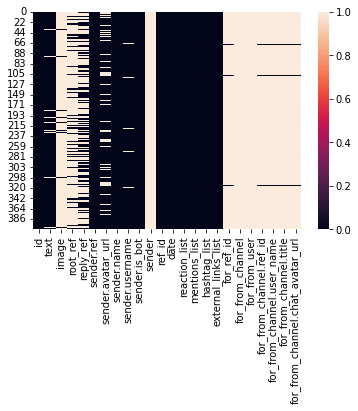

In [39]:
sb.heatmap(data.isnull())

### Lets save this data into dataset and solve the given problem statements. This book mainly focused on extracting valuable information from the given data

In [40]:
data.to_csv("crypto_supermind.csv",index=False)